#### Importing required libraries

In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA,IncrementalPCA
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
%matplotlib inline
warnings.filterwarnings('ignore')

C:\Users\sumasark\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sumasark\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sumasark\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sumasark\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWa

#### Setting row and column width

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Listing the files present in the directory

In [3]:
for dirpath, dirnames, filenames in os.walk(os.getcwdb()):
    print(filenames)

[b'Credit Amount Prediction.ipynb', b'test.csv', b'Test.ipynb', b'train.csv']
[b'Credit Amount Prediction-checkpoint.ipynb', b'Test-checkpoint.ipynb']


#### Lets check the sample file

In [4]:
# sample = pd.read_csv('sample.csv')
# sample.head()

#### Importing training and test dataset

In [5]:
credit_train_df =pd.read_csv('train.csv') 
credit_test_df = pd.read_csv('test.csv')

#### Lets check the shape for datasets

In [6]:
print(credit_train_df.shape)
print(credit_test_df.shape)

(700, 25)
(300, 24)


#### Understandin the data

In [7]:
credit_train_df.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,852,34.08,M,Umarried,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,2400,48.00,F,Divorced,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,2380,47.60,M,Umarried,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,1756,52.68,M,Umarried,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [8]:
credit_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
serial number       700 non-null int64
account_info        427 non-null object
duration_month      700 non-null int64
Loan                700 non-null object
Regularity          700 non-null object
Purpose             700 non-null object
credit_amount       700 non-null int64
savings_account     700 non-null object
Saving Account      580 non-null float64
employment_st       700 non-null object
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null object
Status              700 non-null object
gurantors           700 non-null object
resident_since      700 non-null int64
property_type       700 non-null object
age                 700 non-null int64
installment_type    700 non-null object
housing_type        700 non-null object
credits_no          700 non-null int64
job_type            700 non-null object
liables             

#### Doing some basic checks on the dataset

In [9]:
credit_train_df.describe([0.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
serial number,700.0,350.500000,202.216880,1.00,175.7500,350.50,525.250,630.100,700.00
duration_month,700.0,20.652857,12.279683,4.00,12.0000,18.00,24.000,36.000,72.00
credit_amount,700.0,3182.331429,2725.319217,276.00,1350.7500,2253.00,3913.250,7004.800,15945.00
Saving Account,580.0,265.208621,569.396113,1.00,34.0000,70.00,137.500,702.700,3791.00
Salary,700.0,1610.258571,784.923838,700.00,953.5000,1265.50,2198.250,2855.300,3499.00
investment,700.0,39.365286,6.784642,26.01,33.7425,39.57,44.765,47.922,53.61
resident_since,700.0,2.808571,1.114573,1.00,2.0000,3.00,4.000,4.000,4.00
age,700.0,35.322857,11.319842,19.00,27.0000,33.00,41.000,52.000,75.00
credits_no,700.0,1.392857,0.572328,1.00,1.0000,1.00,2.000,2.000,4.00
liables,700.0,1.148571,0.355920,1.00,1.0000,1.00,1.000,2.000,2.00


In [10]:
round(100*(credit_train_df.isnull().sum()/len(credit_train_df)),2)

serial number        0.00
account_info        39.00
duration_month       0.00
Loan                 0.00
Regularity           0.00
Purpose              0.00
credit_amount        0.00
savings_account      0.00
Saving Account      17.14
employment_st        0.00
Salary               0.00
investment           0.00
Gender               0.00
Status               0.00
gurantors            0.00
resident_since       0.00
property_type        0.00
age                  0.00
installment_type     0.00
housing_type         0.00
credits_no           0.00
job_type             0.00
liables              0.00
telephone            0.00
foreigner            0.00
dtype: float64

#### As we can see there are 39% missing values in 'account_info' column lets drop the column and imputing the 'savings account' with median 

In [11]:
# As we can see that 'account_info' is having 39% missing value lets drop the column
credit_train_df.drop('account_info',inplace=True,axis='columns')
credit_test_df.drop('account_info',inplace=True,axis='columns')

# As  column 'Saving Account' is importaint lets impute missing with -1
credit_train_df.loc[credit_train_df['Saving Account'].isnull(),'Saving Account'] =credit_train_df['Saving Account'].median()
credit_test_df.loc[credit_test_df['Saving Account'].isnull(),'Saving Account'] = credit_test_df['Saving Account'].median()

# credit_train_df.drop('Saving Account',inplace=True,axis='columns')
# credit_test_df.drop('Saving Account',inplace=True,axis='columns')

#### Lets plot a scatter to understand the correlation

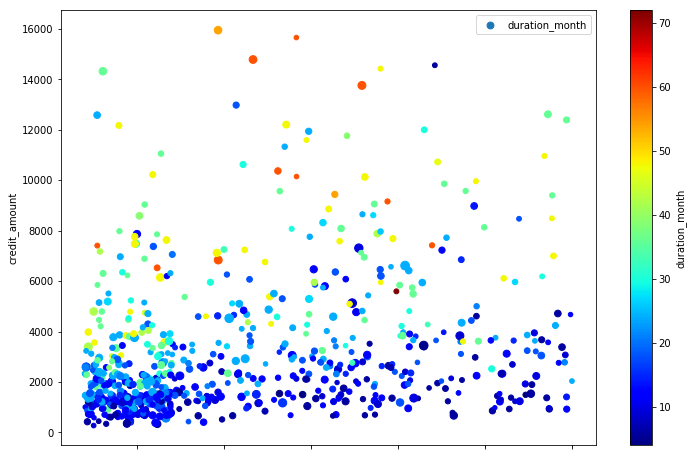

In [12]:
credit_train_df.plot(kind='scatter',x ='Salary',y='credit_amount',alpha=1,s=credit_train_df['age'],
                    label='duration_month',cmap=plt.get_cmap("jet"),
                    c='duration_month',colorbar=True,figsize=(12,8))
plt.legend()
plt.show()

#### lets plot boxplot to understand the amount of outliers present

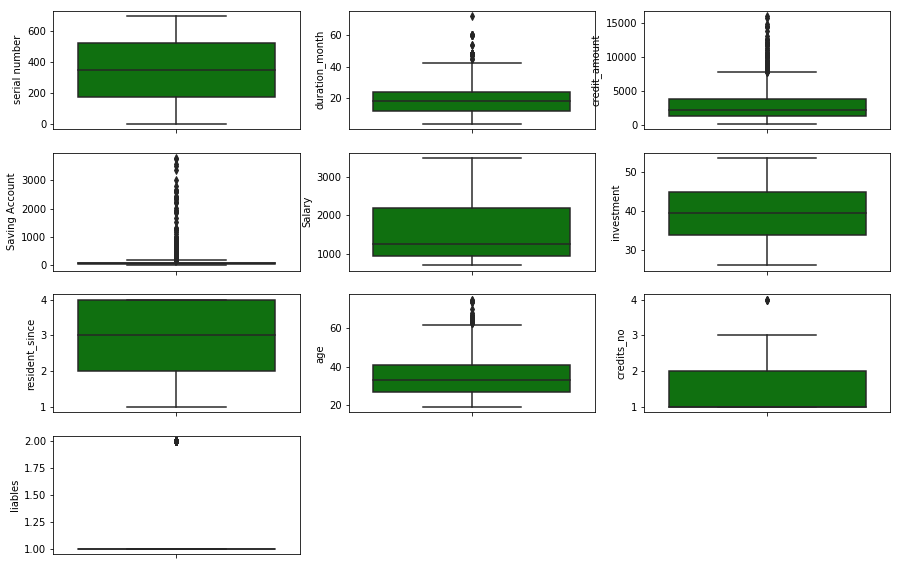

In [13]:
cols_dist = list(credit_train_df.dtypes[credit_train_df.dtypes!='object'].index)
plt.figure(figsize=(15,10))
for i,col in enumerate(cols_dist):
    plt.subplot(4,3,i+1)
    sns.boxplot(y = credit_train_df[col],color='green')

#### Setting the extream values to a value similar to 90%

In [14]:
credit_train_df.loc[credit_train_df.age>36,'age']=52
credit_train_df.loc[credit_train_df.duration_month>36,'duration_month']=36
credit_train_df.loc[credit_train_df.credits_no>36,'credits_no']=2

#### Lets understand the distribution of different variables

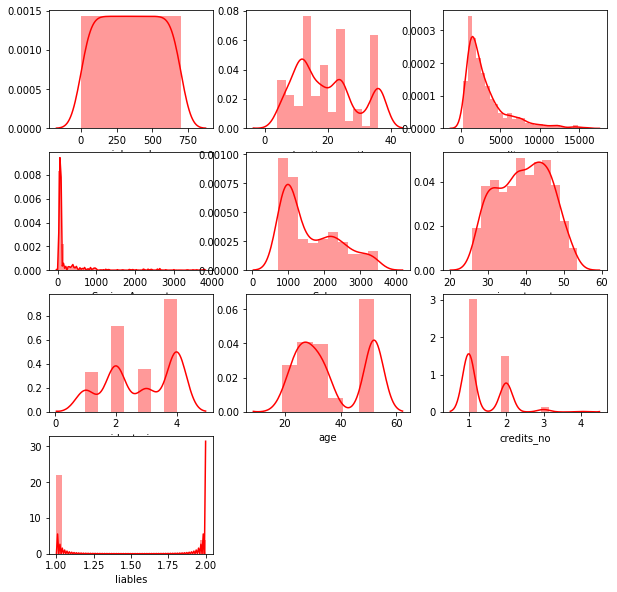

In [15]:
cols_dist = list(credit_train_df.dtypes[credit_train_df.dtypes!='object'].index)
plt.figure(figsize=(10,10))
for i,col in enumerate(cols_dist):
    plt.subplot(4,3,i+1)
    sns.distplot(credit_train_df[col],color='red')

#### Doing a log transformation to make the distribution a gaussian distribution

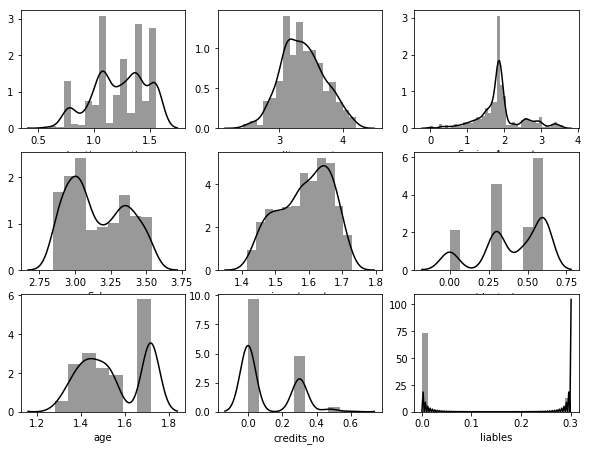

In [16]:
cols_train = list(credit_train_df.dtypes[credit_train_df.dtypes
                              !='object'].index[credit_train_df.dtypes[credit_train_df.dtypes
                                                                                      !='object'].index!='serial number'])
cols_test = list(credit_test_df.dtypes[credit_test_df.dtypes
                              !='object'].index[credit_test_df.dtypes[credit_test_df.dtypes
                                                                                      !='object'].index!='serial number'])
credit_train_df[cols_train] = np.log10(credit_train_df[cols_train])
credit_test_df[cols_test] = np.log10(credit_test_df[cols_test])
plt.figure(figsize=(10,10))
for i,col in enumerate(cols_train):
    plt.subplot(4,3,i+1)
    sns.distplot(credit_train_df[col],color='black')

#### Lets perform EDA on dataset

In [17]:
def analize(independent,response):
    df =credit_train_df.groupby(credit_train_df[independent])[response].count().reset_index()
    plt.title('Analysis of {0}'.format(independent))
    ax = sns.barplot(x=df[independent], y=df[response])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()
    plt.show()

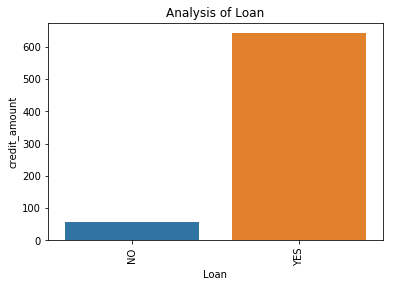

In [18]:
analize('Loan','credit_amount')

#### We can see that the credit amount is high for the people with loans

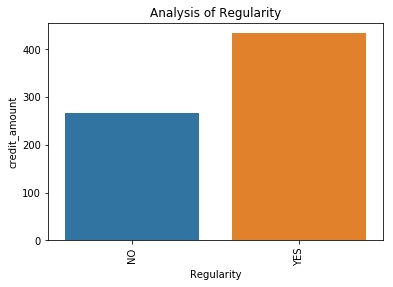

In [19]:
analize('Regularity','credit_amount')

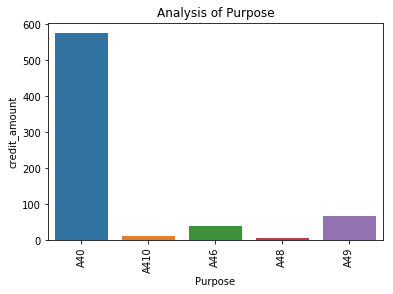

In [20]:
analize('Purpose','credit_amount')

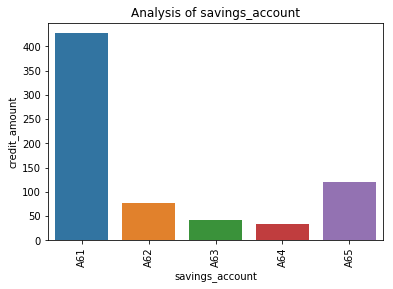

In [21]:
analize('savings_account','credit_amount')

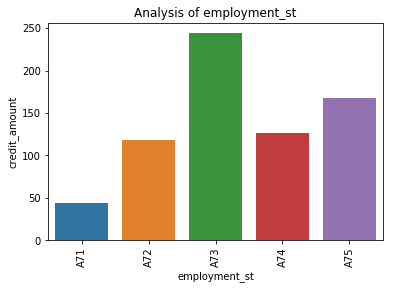

In [22]:
analize('employment_st','credit_amount')

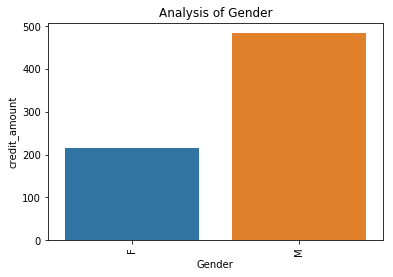

In [23]:
analize('Gender','credit_amount')

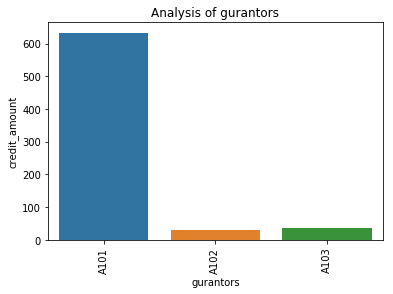

In [24]:
analize('gurantors','credit_amount')

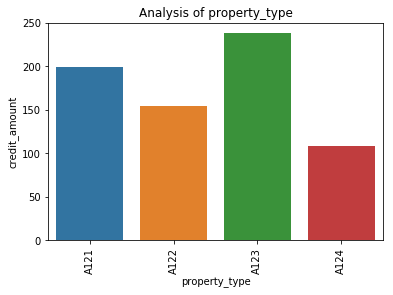

In [25]:
analize('property_type','credit_amount')

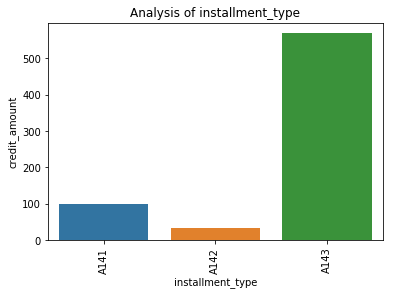

In [26]:
analize('installment_type','credit_amount')

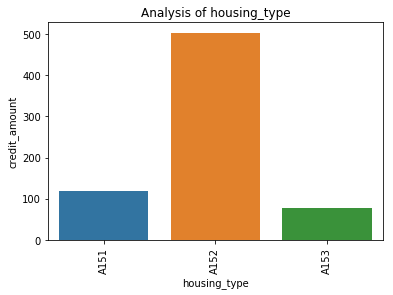

In [27]:
analize('housing_type','credit_amount')

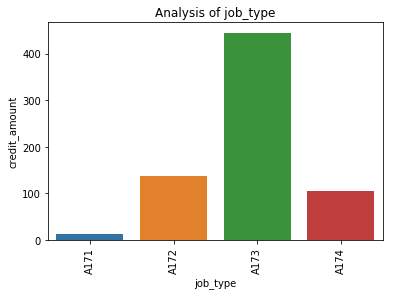

In [28]:
analize('job_type','credit_amount')

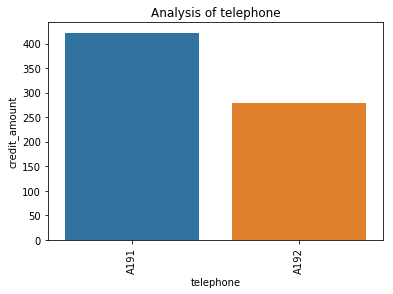

In [29]:
analize('telephone','credit_amount')

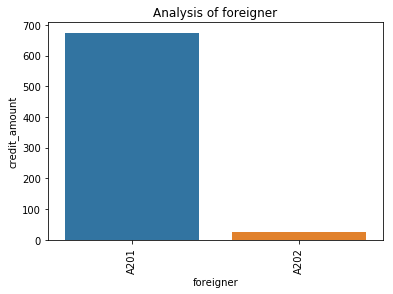

In [30]:
analize('foreigner','credit_amount')

#### lets do a pair plot

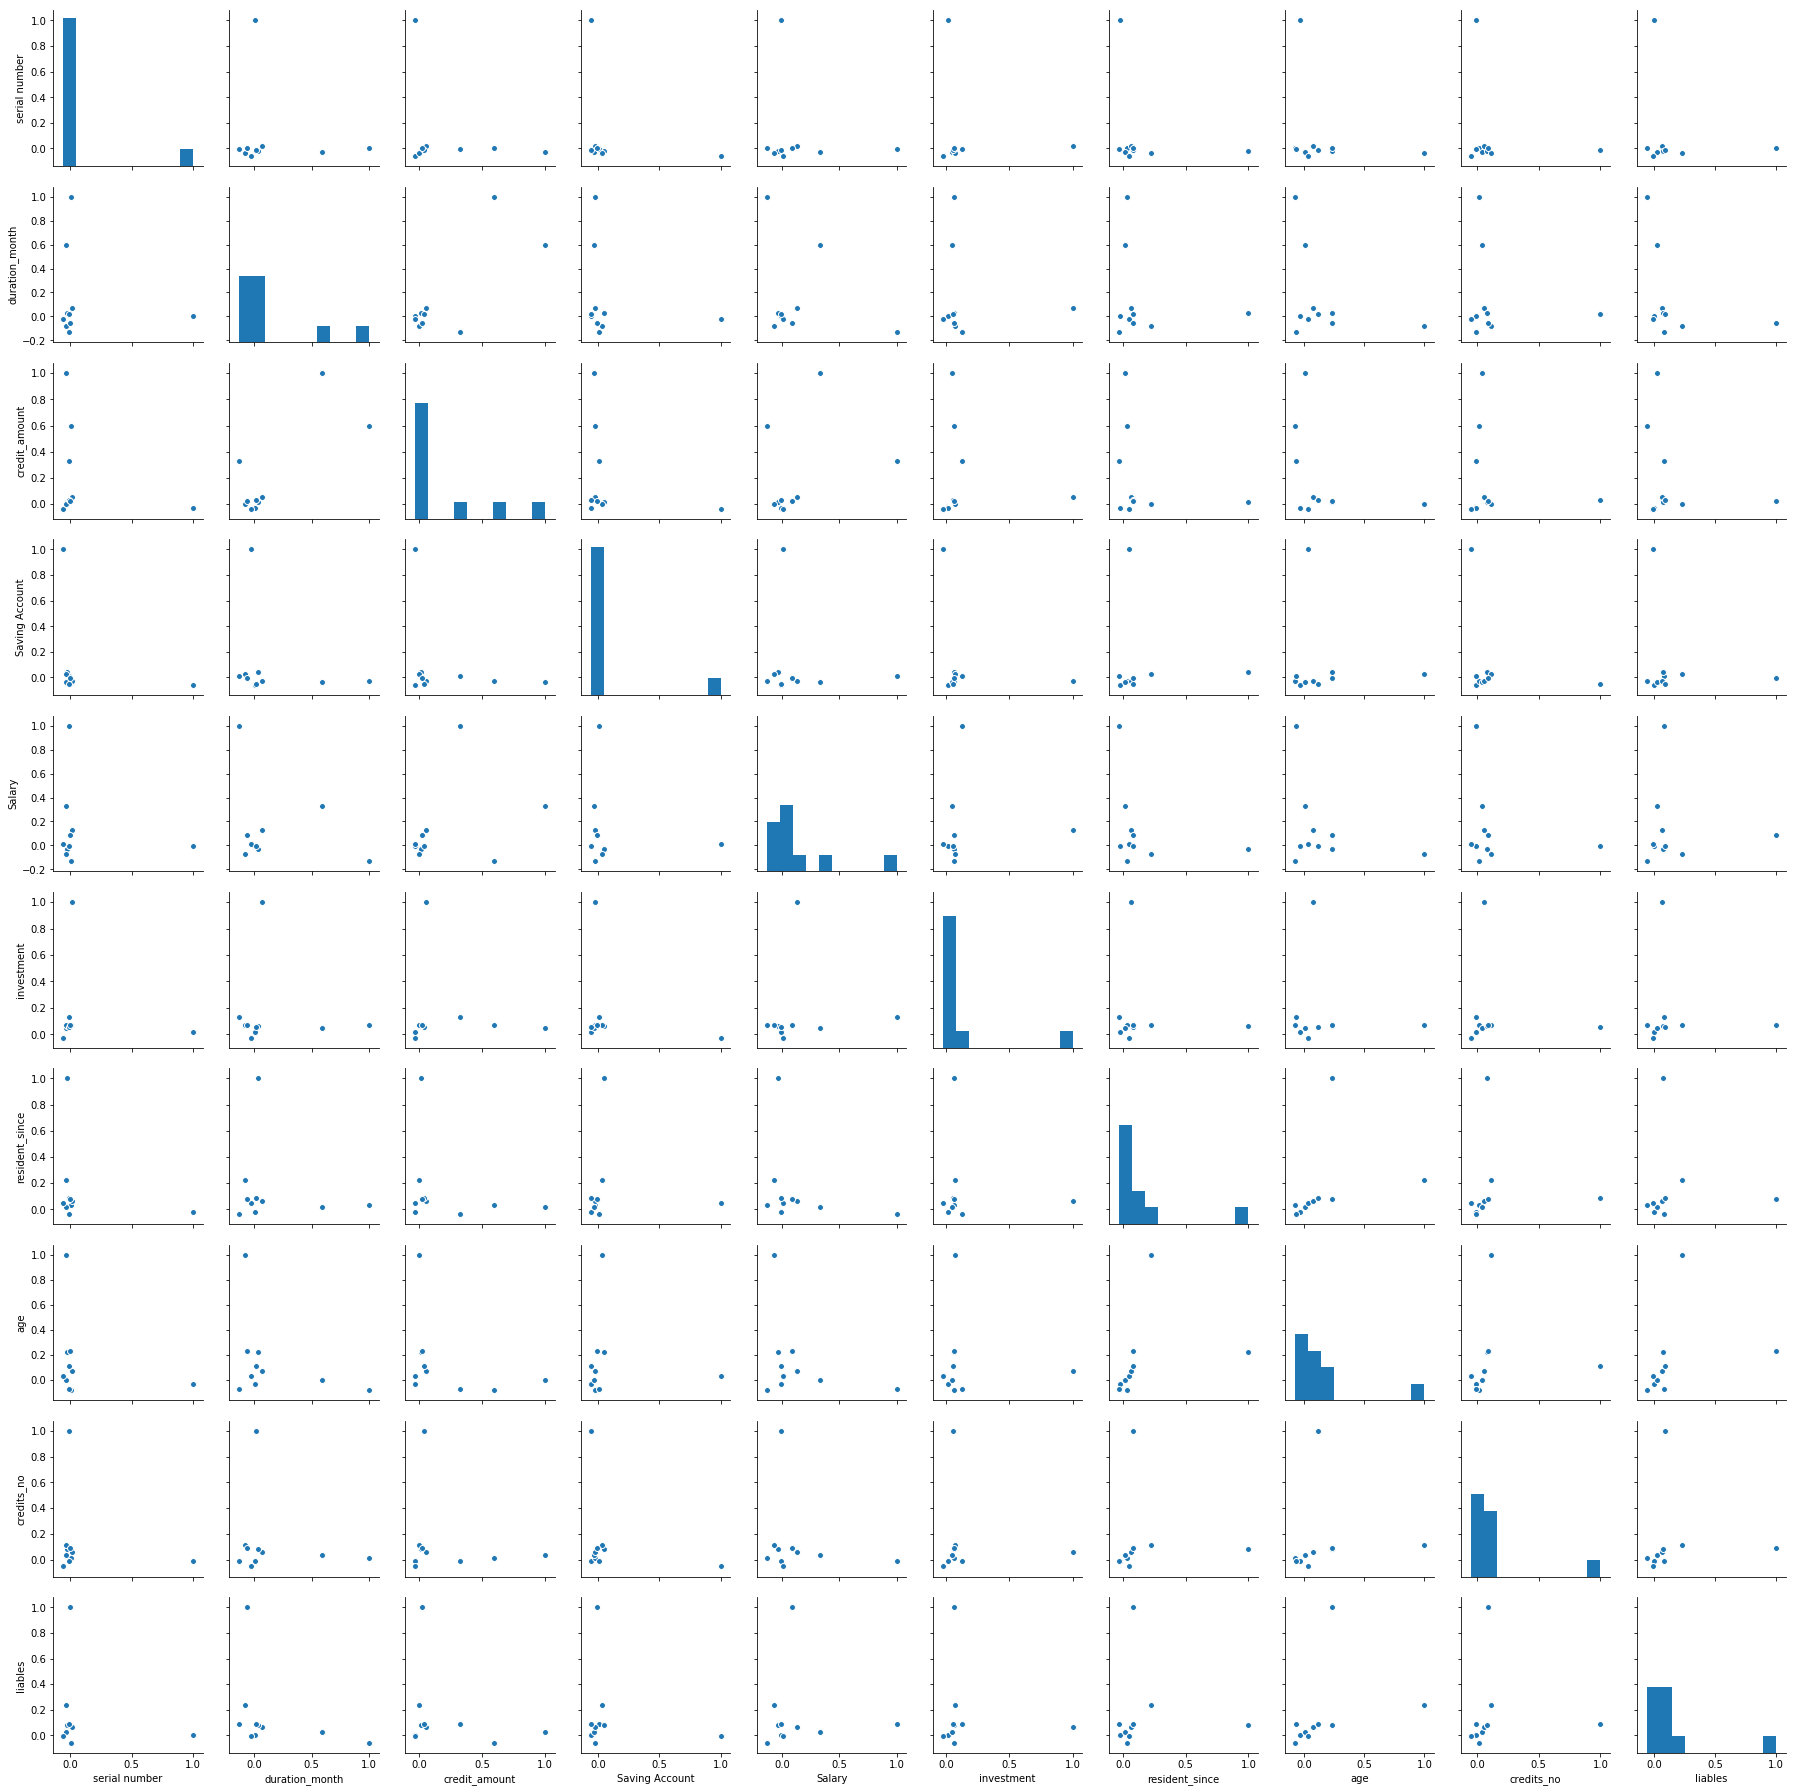

In [31]:
sns.pairplot(credit_train_df.corr())

### Feature Engineering

In [32]:
credit_train_df.dtypes[credit_train_df.dtypes=='object']

Loan                object
Regularity          object
Purpose             object
savings_account     object
employment_st       object
Gender              object
Status              object
gurantors           object
property_type       object
installment_type    object
housing_type        object
job_type            object
telephone           object
foreigner           object
dtype: object

#### Below columns are ordinal variable

In [33]:
credit_train_df[['employment_st','gurantors','job_type','telephone']].head()

,employment_st,gurantors,job_type,telephone
0,A75,A101,A173,A192
1,A73,A101,A173,A191
2,A74,A101,A172,A191
3,A74,A103,A173,A191
4,A73,A101,A173,A191


#### Setting the level for ordinal variables in ascending order

In [34]:
credit_train_df.employment_st = credit_train_df.employment_st.map({'A71':0,'A72':1,'A73':2,'A74':3,'A75':4})
credit_train_df.gurantors = credit_train_df.gurantors.map({'A101':0,'A102':1,'A103':2})
credit_train_df.job_type = credit_train_df.job_type.map({'A171':0,'A172':1,'A173':2,'A174':3})
credit_train_df.telephone = credit_train_df.telephone.map({'A191':0,'A192':1})

credit_test_df.employment_st = credit_test_df.employment_st.map({'A71':0,'A72':1,'A73':2,'A74':3,'A75':4})
credit_test_df.gurantors = credit_test_df.gurantors.map({'A101':0,'A102':1,'A103':2})
credit_test_df.job_type = credit_test_df.job_type.map({'A171':0,'A172':1,'A173':2,'A174':3})
credit_test_df.telephone = credit_test_df.telephone.map({'A191':0,'A192':1})

#### Below columns are binary variable

In [35]:
credit_train_df[['Loan','Regularity','Gender']].head()

,Loan,Regularity,Gender
0,YES,NO,M
1,YES,YES,F
2,YES,NO,M
3,YES,YES,M
4,YES,NO,M


#### Binary transformation

In [36]:
credit_train_df.Loan = credit_train_df.Loan.map({'NO':0,'YES':1})
credit_train_df.Regularity = credit_train_df.Regularity.map({'NO':0,'YES':1})
credit_train_df.Gender = credit_train_df.Gender.map({'F':0,'M':1})

credit_test_df.Loan = credit_test_df.Loan.map({'NO':0,'YES':1})
credit_test_df.Regularity = credit_test_df.Regularity.map({'NO':0,'YES':1})
credit_test_df.Gender = credit_test_df.Gender.map({'F':0,'M':1})

In [37]:
credit_train_df.head()

,serial number,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,0.778151,1,0,A40,3.067815,A65,1.845098,4,2.930440,1.532500,1,Umarried,0,0.602060,A121,1.716003,A143,A152,0.30103,2,0.00000,1,A201
1,2,1.556303,1,1,A40,3.774590,A61,1.857332,2,3.380211,1.681241,0,Divorced,0,0.301030,A121,1.342423,A143,A152,0.00000,2,0.00000,0,A201
2,3,1.079181,1,0,A46,3.321391,A61,1.832509,3,3.317646,1.618676,1,Umarried,0,0.477121,A121,1.716003,A143,A152,0.00000,1,0.30103,0,A201
3,4,1.556303,1,1,A40,3.896636,A61,1.863323,3,3.376577,1.677607,1,Umarried,2,0.602060,A122,1.716003,A143,A153,0.00000,2,0.30103,0,A201
4,5,1.380211,1,0,A40,3.687529,A61,1.716003,2,3.244525,1.721646,1,Umarried,0,0.602060,A124,1.716003,A143,A153,0.30103,2,0.30103,0,A201


#### Performing one hot encoding on the nominal variables

In [38]:
drop_cols = list(credit_test_df.dtypes[credit_test_df.dtypes=='object'].index)
train_cols = pd.get_dummies(credit_train_df[credit_train_df.dtypes[credit_train_df.dtypes=='object'].index],drop_first=True)
credit_train_df = pd.concat([credit_train_df,train_cols],axis=1)

test_cols = pd.get_dummies(credit_test_df[credit_test_df.dtypes[credit_test_df.dtypes=='object'].index],drop_first=True)
credit_test_df = pd.concat([credit_test_df,test_cols],axis=1)

In [39]:
credit_test_df.drop(drop_cols,inplace=True,axis='columns')
credit_train_df.drop(drop_cols,inplace=True,axis='columns')

#### Separating the dependent and independent variable

In [40]:
y = credit_train_df.pop('credit_amount')
X = credit_train_df

#### Lets perform a train test split on dataset

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1001)
X_train_serial = X_train.pop('serial number')
X_test_serial = X_test.pop('serial number')
credit_test_df_serial_no = credit_test_df.pop('serial number')

In [42]:
X_train.head()

,duration_month,Loan,Regularity,Saving Account,employment_st,Salary,investment,Gender,gurantors,resident_since,age,credits_no,job_type,liables,telephone,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,savings_account_A62,savings_account_A63,savings_account_A64,savings_account_A65,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,foreigner_A202
215,0.778151,1,0,1.845098,3,3.527501,1.527501,0,0,0.477121,1.716003,0.30103,1,0.00000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
456,1.041393,1,0,1.740363,2,3.409257,1.710287,1,0,0.301030,1.556303,0.30103,2,0.30103,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
101,1.556303,1,1,1.949390,3,2.937518,1.539578,1,0,0.602060,1.380211,0.00000,2,0.00000,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
249,1.255273,1,1,1.785330,0,3.112270,1.589391,0,1,0.602060,1.342423,0.00000,2,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
458,0.778151,1,1,1.447158,1,2.914872,1.516932,0,0,0.000000,1.431364,0.00000,2,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


#### Lets scale the dataset

In [43]:
scale_cols = ['duration_month','Saving Account','employment_st','Salary','investment','gurantors','resident_since',
              'age','credits_no','job_type','liables']
# scale_cols = ['duration_month','employment_st','Salary','investment','gurantors','resident_since',
#              'age','credits_no','job_type','liables']
scale = RobustScaler()
X_train[scale_cols] = scale.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scale.transform(X_test[scale_cols])
credit_test_df[scale_cols] = scale.transform(credit_test_df[scale_cols])

#### Lets understand the correlation using heatmap

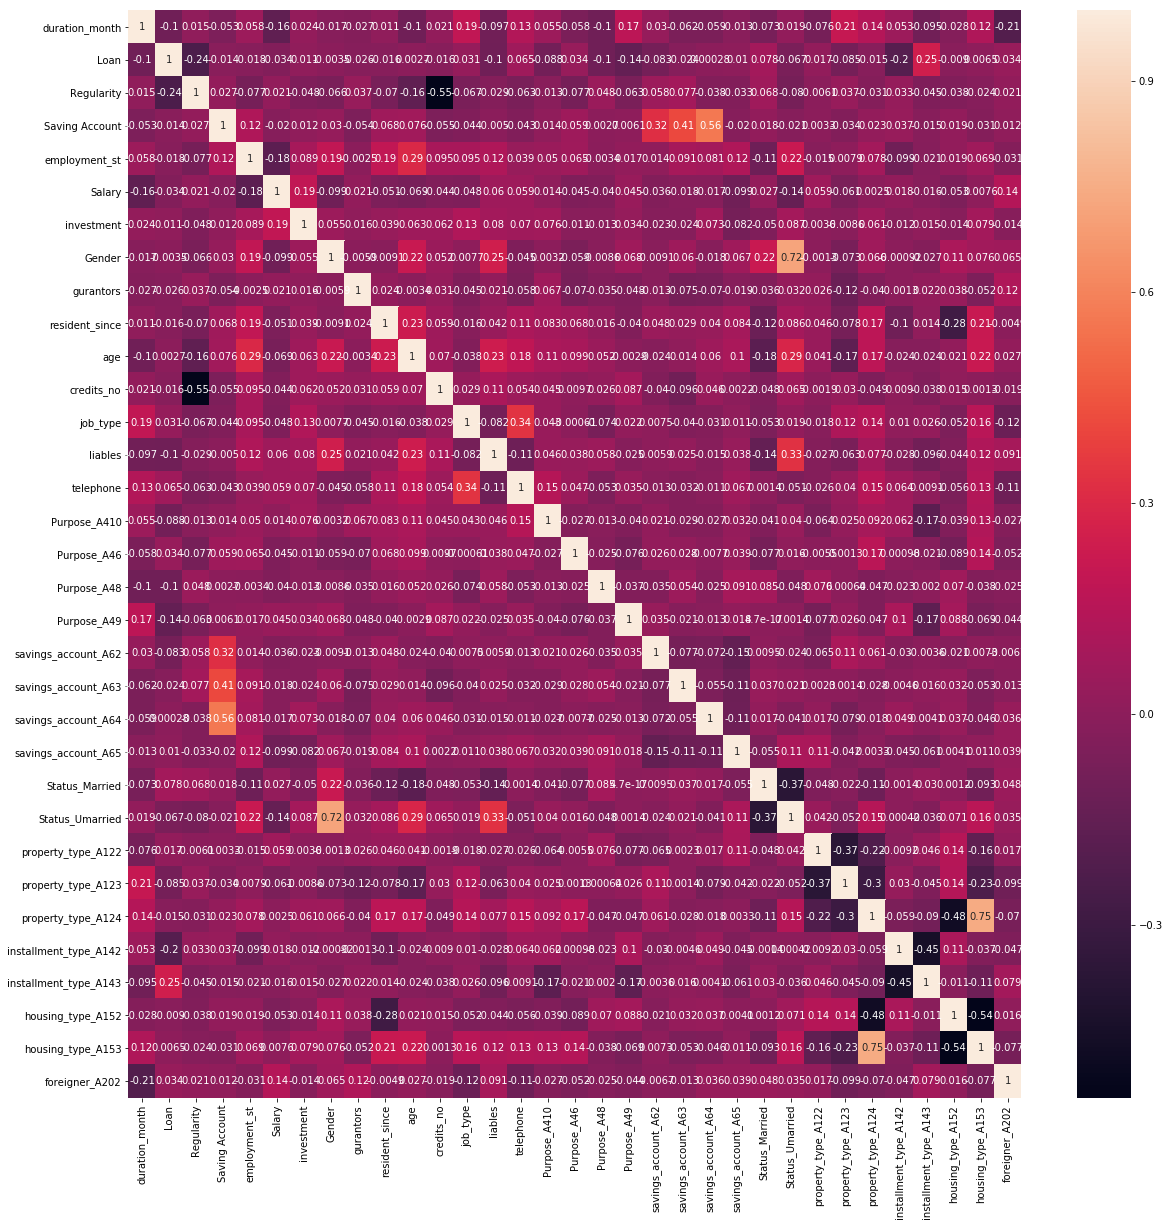

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

#### Lets find the top principle component for >90% variance

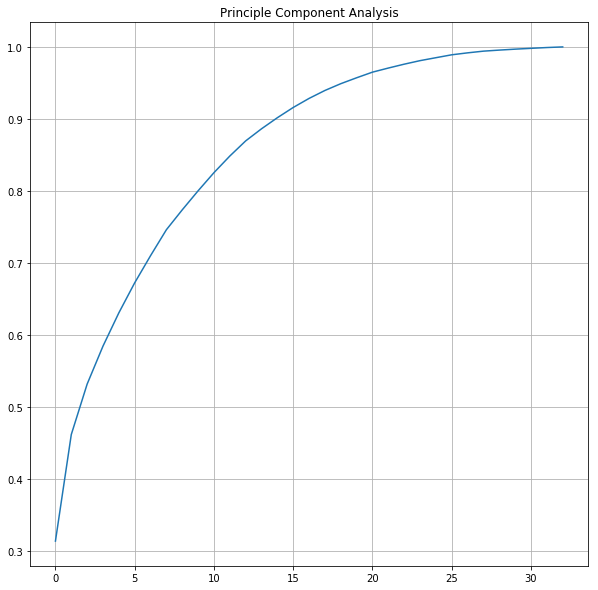

In [45]:
# There are few high corellation lets do a PCA
pca = PCA()
pca.fit_transform(X_train)

plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Principle Component Analysis')
plt.grid()
plt.show()

In [46]:
pca = IncrementalPCA(n_components=25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
credit_test_df = pca.transform(credit_test_df)

###  Lets Start with the Modeling

#### Fitting a linear regression model

In [47]:
# Lets build our base model
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,lr_pred))
print(r2_score(y_test,lr_pred)*100)
print(error)

64.16238796065515
0.22027671880685645


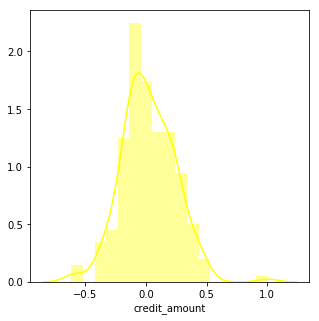

In [48]:
plt.figure(figsize=(5,5))
sns.distplot(y_test-lr_pred,color='yellow')
plt.show()

#### Lets fit a Ridge Regression

In [49]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [50]:
ridge_pred = model_cv.best_estimator_.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,ridge_pred))
print(r2_score(y_test,ridge_pred)*100)
print(error)

62.97470361478705
0.2238970331037832


In [51]:
ridge_pred_test = model_cv.best_estimator_.predict(credit_test_df)

In [52]:
# ridge_pred_test = np.ceil(10**ridge_pred_test)
# credit_test_df_serial_no = pd.DataFrame(credit_test_df_serial_no)
# ridge_pred_test = pd.DataFrame(ridge_pred_test)
# credit_test_df_serial_no = pd.concat([credit_test_df_serial_no,ridge_pred_test],axis=1)
# credit_test_df_serial_no.columns = ['S.no','credit_amount']
# credit_test_df_serial_no.set_index('S.no',inplace=True)
# credit_test_df_serial_no.to_csv('sample.csv')

#### Lets fit a lasso model

In [53]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [54]:
lasso_pred = model_cv.best_estimator_.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,lasso_pred))
print(r2_score(y_test,lasso_pred)*100)
print(error)

64.22662747671862
0.22007920541326614


#### Lets fit  elasticnet model

In [55]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [56]:
cv_model.get_params

<bound method BaseEstimator.get_params of ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)>

In [57]:
elastic_pred = cv_model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,elastic_pred))
print(r2_score(y_test,elastic_pred)*100)
print(error)

63.94697324540929
0.22093775273759492


#### Lets fit a random forest model

In [58]:
random_forest = RandomForestRegressor(n_estimators=500, 
                                               random_state=3,
                                               min_weight_fraction_leaf=0.0002)
param_grid = {"max_depth": [2,3,4, 5,6],
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.1]}
grid_search = GridSearchCV(random_forest, 
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           return_train_score=True,
                          verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0002,
                                             n_estimators=500, n_jobs=None,
                                             oob_score=False, random_state=3,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
      

In [59]:
grid_search.best_score_

0.3758425440076819

#### Lets fit a basic ANN to the data

In [60]:
model_ann = Sequential()
model_ann.add(Dense(32, input_dim=25, kernel_initializer='normal', activation='relu'))
model_ann.add(Dense(16, kernel_initializer='normal', activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(8,kernel_initializer='normal', activation='relu'))
model_ann.add(Dense(1, kernel_initializer='normal',activation='linear'))


model_ann.compile(optimizer='adam',loss='mean_squared_error')
model_ann.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))
pred = model_ann.predict(X_test)
r2_score(y_test,pred)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 490 samples, validate on 210 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
490/490 [==============================] - 1s 1ms/sample - loss: 11.4295 - val_loss: 11.3534
Epoch 2/50
490/490 [==============================] - 0s 81us/sample - loss: 11.2848 - val_loss: 11.1812
Epoch 3/50
490/490 [==============================] - 0s 69us/sample - loss: 11.0629 - val_loss: 10.8722
Epoch 4/50
490/490 [==============================] - 0s 94us/sample - loss: 10.6324 - val_loss: 10.2431
Epoch 5/50
490/490 [==============================] - 0s 90us/sample - loss: 9.7516 - val_loss: 8.9892
Epoch 6/50
490/490 [==============================] - 0s 98us/sample - loss: 8.0800 - val_loss: 6.8140
Epoch 7/50
490/490 [==========================

0.3552706941018877

#### Lets fit on XGBoost

In [61]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   13.7s finished


0.48827444751045584
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [62]:
xgb_pred = xgb_grid.best_estimator_.predict(X_test)
r2_score(y_test,xgb_pred)
# xgb_pred = 10**xgb_pred

0.6000243710685418

#### Lets use stacking technique

In [63]:
# Stacking
m1 = LinearRegression()
m2 = Ridge(alpha=10.0)
m3 = Lasso(alpha= 0.01)
m4 = ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)
m5 = RandomForestRegressor(max_depth=5,max_leaf_nodes=20, min_samples_leaf=5, 
                           min_samples_split= 15,
                            n_estimators=500, 
                            random_state=3,
                            min_weight_fraction_leaf=0.0002)
m6 = XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500,nthread=4,objective='reg:linear', silent=1, subsample=0.7)

######################
m1.fit(X_train,y_train)
m2.fit(X_train,y_train)
m3.fit(X_train,y_train)
m4.fit(X_train,y_train)
m5.fit(X_train,y_train)
m6.fit(X_train,y_train)

######################

m1_pred = m1.predict(X_test)
m2_pred = m2.predict(X_test)
m3_pred = m3.predict(X_test)
m4_pred = m4.predict(X_test)
m5_pred = m5.predict(X_test)
m6_pred = m6.predict(X_test)

#######################

m1_pred_test = m1.predict(credit_test_df)
m2_pred_test = m2.predict(credit_test_df)
m3_pred_test = m3.predict(credit_test_df)
m4_pred_test = m4.predict(credit_test_df)
m5_pred_test = m5.predict(credit_test_df)
m6_pred_test = m6.predict(credit_test_df)

######################

stacked_pred = np.column_stack((m1_pred,m2_pred,m3_pred,m4_pred,m5_pred,m6_pred))
stacked_pred_test = np.column_stack((m1_pred_test,m2_pred_test,m3_pred_test,m4_pred_test,m5_pred_test,m6_pred_test))


meta_model = LinearRegression()
meta_model.fit(stacked_pred,y_test)

########################
stacked_test = meta_model.predict(stacked_pred_test)
# stacked_test = np.ceil(10**stacked_test)
# credit_test_df_serial_no = pd.DataFrame(credit_test_df_serial_no)
# stacked_test = pd.DataFrame(stacked_test)
# credit_test_df_serial_no = pd.concat([credit_test_df_serial_no,stacked_test],axis=1)
# credit_test_df_serial_no.columns = ['S.no','credit_amount']
# credit_test_df_serial_no.set_index('S.no',inplace=True)
# credit_test_df_serial_no.to_csv('sample.csv')

#### **** Note XGBoost & ANN will never perform good on a dataset where the datapoints are limited to 700 ,I have fitted only for testing purpose

### Final Model

In [64]:
lr_final_model = LinearRegression()
lr_final_model.fit(X_train,y_train)
lr_pred = lr_final_model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,lr_pred))
print(r2_score(y_test,lr_pred)*100)
print(error)

64.16238796065515
0.22027671880685645


In [65]:
lr_final = lr_final_model.predict(credit_test_df)
lr_final = np.ceil(10**lr_final)
credit_test_df_serial_no_n = pd.DataFrame(credit_test_df_serial_no)
lr_final = pd.DataFrame(lr_final)
credit_test_df_serial_no_n = pd.concat([credit_test_df_serial_no_n,lr_final],axis=1)
credit_test_df_serial_no_n.columns = ['S.no','credit_amount']
credit_test_df_serial_no_n.set_index('S.no',inplace=True)
credit_test_df_serial_no_n.to_csv('sample.csv')